# **Importing Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Dataset**

In [ ]:
pd.set_option('display.max_columns',None)
burnoutDf=pd.read_csv('/home/content drive/test.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [ ]:
burnoutDf1=pd.read_csv('/content/sample_submission.csv')
burnoutDf1

,Employee ID,Burn Rate
0,fffe32003000360033003200,0.16
1,fffe3700360033003500,0.36
2,fffe31003300320037003900,0.49
3,fffe32003400380032003900,0.20
4,fffe31003900340031003600,0.52


In [ ]:
burnoutDf["Date of Joining"]=pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
burnoutDf.shape

(12250, 8)

In [ ]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           12250 non-null  object        
 1   Date of Joining       12250 non-null  datetime64[ns]
 2   Gender                12250 non-null  object        
 3   Company Type          12250 non-null  object        
 4   WFH Setup Available   12250 non-null  object        
 5   Designation           12250 non-null  float64       
 6   Resource Allocation   12250 non-null  float64       
 7   Mental Fatigue Score  12250 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 765.8+ KB


In [ ]:
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [ ]:
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score'],
      dtype='object')

In [ ]:
burnoutDf.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
burnoutDf.duplicated().sum()

0

In [ ]:
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score
count,12250.000000,12250.000000,12250.000000
mean,2.175265,4.458857,5.720571
std,1.132885,2.045602,1.914063
min,0.000000,1.000000,0.000000
25%,1.000000,3.000000,4.500000
50%,2.000000,4.000000,5.900000
75%,3.000000,6.000000,7.100000
max,5.000000,10.000000,10.000000


In [ ]:
for i, col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")

  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe31003300390039003000' 'fffe31003300310037003800'
 'fffe33003400380035003900' ... 'fffe31003800340039003000'
 'fffe32003600380031003800' 'fffe32003100390037003800']

fffe31003300390039003000    1
fffe3800380039003700        1
fffe33003100340031003600    1
fffe33003400360035003800    1
fffe31003300330038003800    1
                           ..
fffe32003000360030003900    1
fffe3900360031003900        1
fffe3700330038003800        1
fffe32003800300035003100    1
fffe32003100390037003800    1
Name: Employee ID, Length: 12250, dtype: int64




['2008-12-10T00:00:00.000000000' '2008-08-14T00:00:00.000000000'
 '2008-11-13T00:00:00.000000000' '2008-02-07T00:00:00.000000000'
 '2008-07-17T00:00:00.000000000' '2008-09-19T00:00:00.000000000'
 '2008-01-16T00:00:00.000000000' '2008-02-10T00:00:00.000000000'
 '2008-08-10T00:00:00.000000000' '2008-05-20T00:00:00.000000000'
 '2008-12-17T00:00:00.000000000' '2008-03-26T00:00:00.000000000'
 '2008-02-27T00:00:00.000000000' '2008-02-01T00:00:00.00

In [ ]:
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

# **Check the skewness of the attributes**

In [ ]:
intFloatburnoutDf=burnoutDf.select_dtypes([np.int,np.float])
for i, col in enumerate(intFloatburnoutDf.columns):
  if(intFloatburnoutDf[col].skew() >=0.1):
    print("\n",col, "feature is positively skewed and value is:",intFloatburnoutDf[col].skew())
  elif(intFloatburnoutDf[col].skew() <=0.1):
    print("\n",col, "feature is negtively skewed and value is:",intFloatburnoutDf[col].skew())
  else:
    print("\n",col, "feature is Normally Distributed skewed and value is:",intFloatburnoutDf[col].skew())





 Designation feature is negtively skewed and value is: 0.062401076707204226

 Resource Allocation feature is positively skewed and value is: 0.21177056297177618

 Mental Fatigue Score feature is negtively skewed and value is: -0.42999327871114656


# **Replace null values with mean**

In [ ]:
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(),inplace=True)

In [ ]:
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(),inplace=True)
burnoutDf1['Burn Rate'].fillna(burnoutDf1['Burn Rate'].mean(),inplace=True)


In [ ]:
burnoutDf.isna().sum()


Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
burnoutDf1.isna().sum()

Employee ID    0
Burn Rate      0
dtype: int64

In [ ]:
burnoutDf.corr()


,Designation,Resource Allocation,Mental Fatigue Score
Designation,1.000000,0.877639,0.688928
Resource Allocation,0.877639,1.000000,0.797827
Mental Fatigue Score,0.688928,0.797827,1.000000


In [ ]:
burnoutDf1.corr()

,Burn Rate
Burn Rate,1.0


# **Data Visualization**

In [ ]:
Corr=burnoutDf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(Corr,text_auto=True, aspect="auto")
fig.show()

In [ ]:
Corr=burnoutDf1.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(Corr,text_auto=True, aspect="auto")
fig.show()

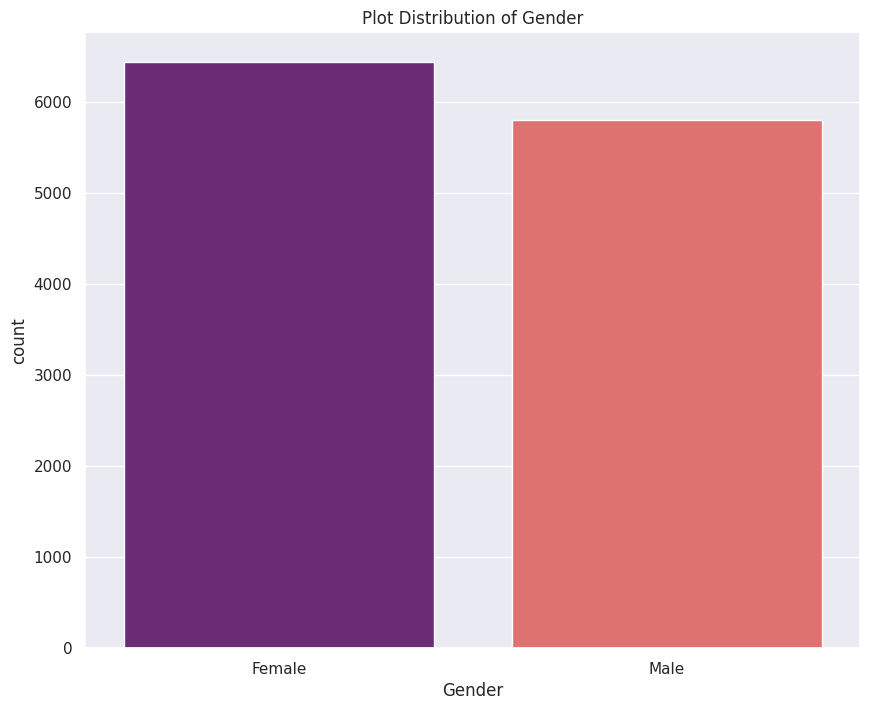

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=burnoutDf,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

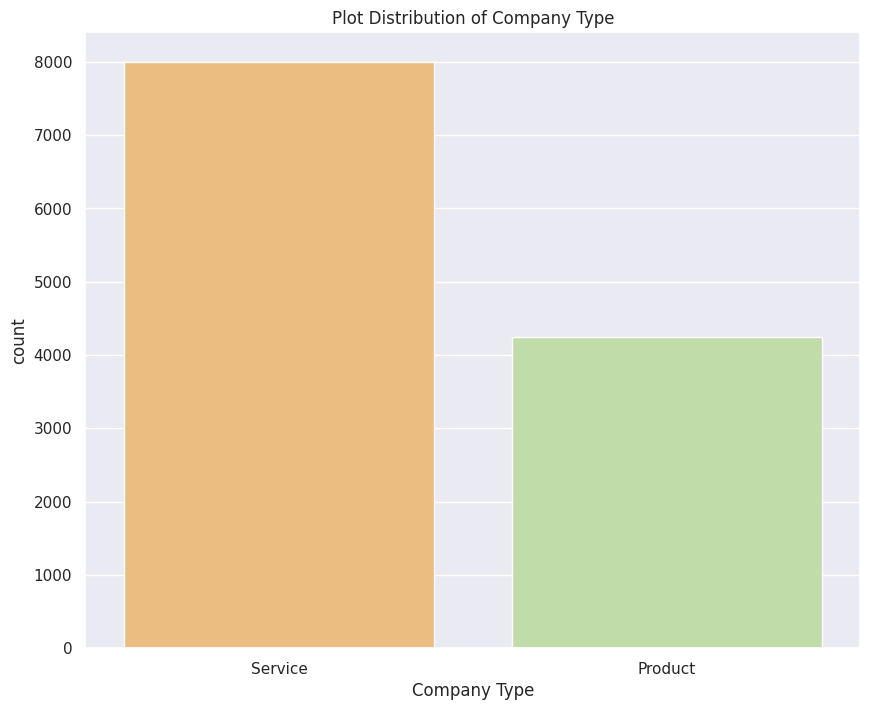

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=burnoutDf,palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

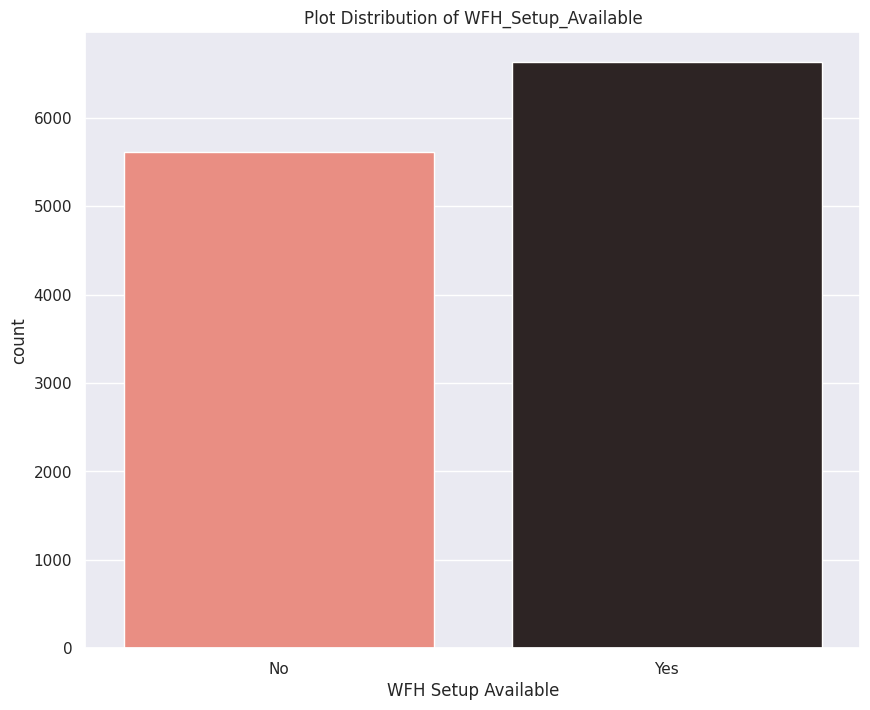

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=burnoutDf,palette="dark:salmon_r")
plt.title("Plot Distribution of WFH_Setup_Available")
plt.show()

In [ ]:
burn_st=burnoutDf.loc[:,'Date of Joining':'Mental Fatigue Score']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st, x=col, title="Plot Distribution of"+col, color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
burn_st=burnoutDf1.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st, x=col, title="Plot Distribution of"+col, color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
fig=px.line(burnoutDf1,y="Burn Rate", color="Employee ID", title=" Burn Rate in the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.line(burnoutDf,y="Mental Fatigue Score", color="Designation", title=" Burn Rate in the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.line(burnoutDf,y="Resource Allocation", color="Gender", title=" Burn Rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig=px.line(burnoutDf,y="Mental Fatigue Score", color="Designation", title=" Mental Fatigue Score on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

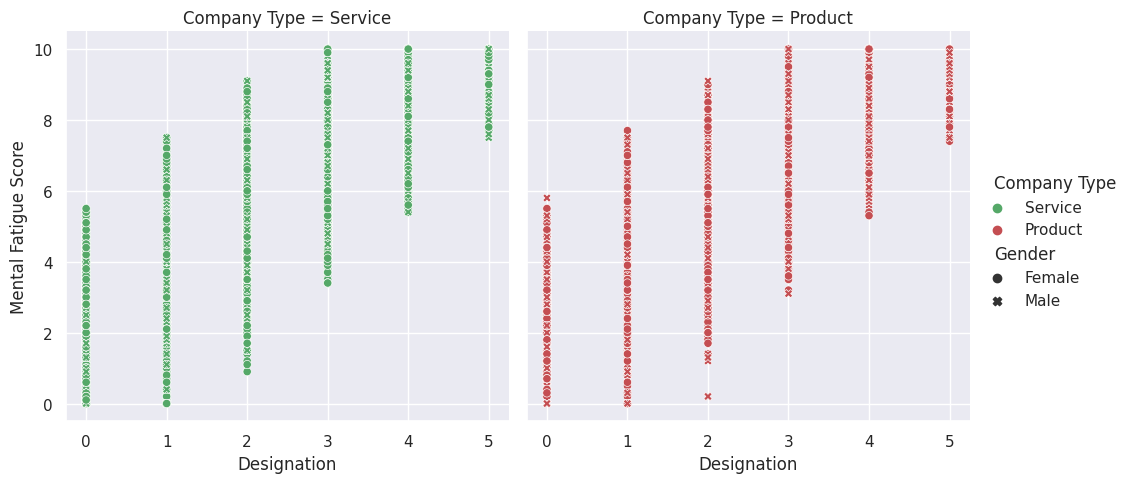

In [ ]:
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", style="Gender",
    palette=["g", "r"], sizes=(50, 200))

# **Label Encoding**

In [ ]:
from sklearn import preprocessing
Label_encode= preprocessing.LabelEncoder()

In [ ]:
burnoutDf['GenderLabel']=Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel']=Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLabel']=Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)


In [ ]:
gn=burnoutDf.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
ct=burnoutDf.groupby('Company Type')
ct=ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
wsa=burnoutDf.groupby('WFH Setup Available')
wsa=wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
burnoutDf.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
12240,fffe3500380037003100,2008-09-29,Male,Product,Yes,3.0,4.0,5.3,1,0,1
12241,fffe31003700340032003700,2008-04-01,Female,Product,Yes,3.0,6.0,7.5,0,0,1
12242,fffe31003200360032003900,2008-03-11,Female,Service,Yes,2.0,3.0,7.2,0,1,1
12243,fffe3800370039003200,2008-05-10,Female,Product,Yes,2.0,4.0,5.1,0,0,1
12244,fffe3700320039003000,2008-08-29,Female,Service,Yes,2.0,5.0,4.3,0,1,1
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,0,1,1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,0,0,1
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,1,1,0
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,1,1,0
12249,fffe32003100390037003800,2008-08-05,Female,Product,No,2.0,2.0,2.0,0,0,0


# **Feature Selection**

In [ ]:
Columns=['Designation','Resource Allocation','Mental Fatigue Score','GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=burnoutDf[Columns]
y=burnoutDf1['Burn Rate']

In [ ]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0              2.0                  5.0                   7.7            0   
1              1.0                  2.0                   5.2            0   
2              1.0                  3.0                   5.9            1   
3              3.0                  6.0                   4.6            0   
4              2.0                  5.0                   6.4            0   
...            ...                  ...                   ...          ...   
12245          1.0                  2.0                   6.1            0   
12246          2.0                  4.0                   5.9            0   
12247          4.0                  7.0                   9.6            1   
12248          3.0                  6.0                   6.7            1   
12249          2.0                  2.0                   2.0            0   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [ ]:
print(y)

0    0.16
1    0.36
2    0.49
3    0.20
4    0.52
Name: Burn Rate, dtype: float64


# **Implementing PCA**

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(0.95)
x_train_pca=pca.fit_transform(x)
print("PCA shape of x is:",x_pca.shape, "and original shape is: ",x.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("the number of features selected through PCA is:", pca.n_components_)

PCA shape of x is: (12250, 4) and original shape is:  (12250, 6)
% of importance of selected features is: [0.81434742 0.09223339 0.02530696 0.02360962]
the number of features selected through PCA is: 4
